# Fireveg DB - overview of trait coverage

Author: [José R. Ferrer-Paris](https://github.com/jrfep) and [Ada Sánchez-Mercado](https://github.com/adasanchez)

Date: January 2025

This Jupyter Notebook includes **R code to analyse and visualise** data exported from the Fireveg Database. 

Here we will read input from a public data record of the database to answer some questions about the data coverage of the database.

```mermaid
flowchart LR
    Litrev & Form  --> Fireveg --> DR --> Code --> Q1 & Q2 & Q3
    Q2 --> Q4 & Q5 & Q6
    Fireveg[(Fireveg\nDatabase)]
    Litrev[Field work\ndata stream] 
    Form[Existing sources\n data stream] 
    BioNet(BioNet Atlas\nSpecies list) 
    BioNet -.-> Fireveg
    Code{R code\nfor analysis}:::ThisRepo
    DR[Exported\nData Record\nVersion 1.1]
    Q3["Q2. ..."]
    Q2["Q3. Trait values\n(NSW plant species)"]:::ThisRepo
    Q1["Q1. ..."]    
    Q4["Q2.1 ..."]:::ThisRepo   
    Q5["Q2.2 ..."]:::ThisRepo
    Q6["Q2.3 etc."]:::ThisRepo
classDef ThisRepo fill:none,stroke:black,color:black;
```

## Set-up

### Load packages

In [1]:
library(ggplot2)
library(dplyr)
require(tidyr)
library(readr)
library(stringr)
library(waffle)
library(ggtext)
library(cowplot)
library(readxl)    # For reading data in Excel format
library(forcats)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr



For [Markdown display from a code cell](https://stackoverflow.com/questions/35786496/using-r-in-jupyter-display-markdown-in-loop?rq=4).

In [2]:
library(IRdisplay)

For data download from cloud storage

In [3]:
require(osfr)
library(jsonlite)
library(httr)

Loading required package: osfr

Automatically registered OSF personal access token

Warning message:
“package ‘jsonlite’ was built under R version 4.3.3”


### Paths for inputs and outputs

Locate the root directory of the repo

In [4]:
here::i_am("Notebooks/22-Overview-field-records.ipynb")

here() starts at /Users/z3529065/proyectos/fireveg/fireveg-analysis



Relative path to local data files within project repository

In [5]:
data_dir <- here::here("data")
if (!dir.exists(data_dir))
    dir.create(data_dir)

### Read data from local folder

<div class="alert alert-info">
     <img src='../img/open-data-2.png' width=25 alt="open data icon"/>
Data for this Notebook is available from the following repositories:

> Ferrer-Paris, J. R., Keith, D., & Sánchez-Mercado, A. (2024, August 15). Export data records from Fire Ecology Traits for Plants database. Retrieved from [osf.io/h96q2](https://osf.io/h96q2/)

and 
> Ferrer-Paris, J. R.; Keith, D. (2024). Fire Ecology Traits for Plants: Database exports. figshare. Dataset. Retrieved from <https://doi.org/10.6084/m9.figshare.24125088.v2>
</div>

See notebook [00-Data-download](00-Data-download.ipynb) for instructions on how to download the data programatically with R.

The data is now available in our local data folder and we can use `read_csv` functions to read `CSV` files:

In [58]:
trait_data <- read_csv(here::here(data_dir, "figshare_data", "fireveg-trait-records.csv"), show_col_types = FALSE)

New names:
• `` -> `...1`


In [74]:
field_records <- read_csv(here::here(data_dir, "figshare_data", "fireveg-field-records.csv"), 
                          col_types = "dcDdcddccddddddddccc")

New names:
• `` -> `...1`


In [75]:
head(field_records)

...1,visit_id,visit_date,sample_nr,species,species_code,bionet_code,resprout_organ,seedbank,adults_unburnt,resprouts_live,resprouts_died,resprouts_kill,resprouts_reproductive,recruits_live,recruits_reproductive,recruits_died,scorch,life_stage,comments
<dbl>,<chr>,<date>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,AlpAsh_18,2021-04-15,1,Cassinia aculeata,1360,1360,None,Soil-persistent,0,0,0,NA,0,1,0,0,NA,NA,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics', 'seedbank written as persistent soil']"
1,AlpAsh_18,2021-04-15,1,Olearia erubescens,1591,1591,Basal,Non-canopy,0,31,0,NA,0,0,0,0,NA,NA,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics']"
2,AlpAsh_18,2021-04-15,1,Daviesia ulicifolia,2827,2827,Basal,Soil-persistent,0,1,0,NA,0,0,0,0,NA,NA,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics', 'seedbank written as persistent soil']"
3,AlpAsh_18,2021-04-15,1,Gonocarpus montanus,3244,3244,NA,Soil-persistent,0,0,0,NA,0,6,0,0,NA,NA,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics', 'seedbank written as persistent soil']"
4,AlpAsh_18,2021-04-15,1,Arthropodium milleflorum,3517,3517,Tuber,Transient,0,70,0,NA,70,NA,NA,NA,NA,NA,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics']"
5,AlpAsh_18,2021-04-15,1,Acacia obliquinervia,3837,3837,Basal,Soil-persistent,0,2,0,NA,0,10,0,0,NA,NA,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics', 'seedbank written as persistent soil']"


Use `read_excel` to read files in `XLSX` format:

In [165]:

species_list <- read_excel(here::here(data_dir, "figshare_data","fireveg-field-report-model.xlsx"), sheet = 4) |> 
    filter(!duplicated(tolower(`Scientific name (as entered)`))) |> # clean some duplicates
    mutate(Family = recode(Family, 
                         "Fabaceae (Faboideae)" = "Fabaceae")) # Fix one family name
sites_record <- read_excel(here::here(data_dir, "figshare_data","fireveg-field-report-model.xlsx"), sheet = 2)


We can use `readRDS` to read this file format into our R session:

In [77]:
traits_table <- readRDS(here::here(data_dir,'Summary-traits-sources.rds'))
references <- readRDS(here::here(data_dir,"References-traits-sources.rds"))
quadrat_samples <- readRDS(here::here(data_dir,"Quadrat-sample-data.rds"))
trait_info <- readRDS(here::here(data_dir,"Trait-info.rds"))

Import summary of species with traits information from existing sources and field work and with extra taxonomic information (plant orders). 

In [78]:
spp_traits_table <- readRDS(here::here(data_dir,"Summary-traits-species-orders.rds")) |>
  rowwise() |>
  mutate(`Existing sources`=sum(c_across(germ8:surv1))>0) %>% # add column for summary of literature traits
  ungroup() |>
  mutate(
    `Field samples`=nquadrat>0, ## add colum for summary of field work data
    fire_ecology_traits_from=case_when(
      `Field samples` & `Existing sources` ~ "both",
      `Field samples` ~ "field",
      `Existing sources` ~ "literature",
      TRUE ~ "none"
    )
  )

## Fireveg Database

```mermaid
flowchart LR
     Fireveg --> DR --> Code --> Q1 & Q2 & Q3
    Q2 --> Q4 & Q5 & Q6
    Fireveg[(Fireveg\nDatabase)]
   
    DR[Exported\nData Record\nVersion 1.1]
    Code{R code\nfor analysis}:::ThisRepo
    Q1[Q1. ...]
    Q2["Q2. Trait coverage\n(NSW plant species)"]:::ThisRepo
    Q3["Q3. ..."] 
    Q4["Q4. Range of observed values for each trait"]:::ThisRepo  
    Q5["Q5. ..."]:::ThisRepo  
    Q6["Q6. ..."]:::ThisRepo   
classDef ThisRepo fill:none,stroke:black,color:black;

```

In [89]:
table(trait_data$`trait code`)


 disp1  germ1  germ8  rect2  repr2  repr3 repr3a  repr4  surv1  surv4  surv5 
 24174   3916   1170   1088    254    931    654     23  28574   1392   1261 

In [229]:
waffle_plot_trait <- function(x, trait_code, legend_rows = 1) {
    
trait_summary <- x |> 
    dplyr::filter(`trait code` %in% trait_code) |> 
    group_by(`norm value`) |>
    summarise(n = n_distinct(`scientific name`)) 

fig_caption <- sprintf("***%s*** (n = %s)",
                       trait_code, sum(trait_summary$n))

trait_summary |>
ggplot(aes(values = n, fill = `norm value`)) +
  geom_waffle(
    n_rows =10,        # Number of squares in each row
    color = "white",   # Border color
    flip = F, na.rm = TRUE, 
    make_proportional = T,
    show.legend = T) +
    coord_equal() +
    theme_void() +
    theme(legend.position="right", 
          legend.text=element_text(size=14),
          plot.title=element_markdown(size=16)) +
    labs(title=fig_caption) +
    guides(fill=guide_legend(title="", ncol = legend_rows))
}


In [323]:
trait_code <- "repr4"
trait_summary <- dplyr::filter(trait_data, `trait code` %in% trait_code) 
trait_summary <- trait_summary |> 
     mutate(`norm value`=str_replace_all(`norm value`,"\\[|\\]","")) |>
    separate(`norm value`,
                    into=c("best", "lower", "upper"), sep = ",") |>
    mutate(value = as.numeric(best)) |>
    filter(!is.na(value))
sprintf("***%s*** (n = %s)",
                       trait_code, n_distinct(trait_summary$`scientific name`))
    

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `value = as.numeric(best)`.
Caused by warning:
! NAs introduced by coercion”


[1] "***repr4*** (n = 11)"

In [319]:
trait_summary

...1,scientific name,current code (BioNET),original name,CAPS code,trait code,trait name,method,weight,source ref,other ref,recordid,bound,value
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
61829,Acacia acinacea,3699,Acacia acinacea,3699,repr3,Age at first flower production (from seed),NA,1,NSWFFRDv2.1,"['Department Natural Resources Environment ', 'Wark 1997']",1758,best,3
61829,Acacia acinacea,3699,Acacia acinacea,3699,repr3,Age at first flower production (from seed),NA,1,NSWFFRDv2.1,"['Department Natural Resources Environment ', 'Wark 1997']",1758,lower,NA
61829,Acacia acinacea,3699,Acacia acinacea,3699,repr3,Age at first flower production (from seed),NA,1,NSWFFRDv2.1,"['Department Natural Resources Environment ', 'Wark 1997']",1758,upper,NA
61830,Acacia aculeatissima,3700,Acacia aculeatissima,3700,repr3,Age at first flower production (from seed),NA,1,NSWFFRDv2.1,['Department Natural Resources Environment '],1759,best,4
61830,Acacia aculeatissima,3700,Acacia aculeatissima,3700,repr3,Age at first flower production (from seed),NA,1,NSWFFRDv2.1,['Department Natural Resources Environment '],1759,lower,NA
61830,Acacia aculeatissima,3700,Acacia aculeatissima,3700,repr3,Age at first flower production (from seed),NA,1,NSWFFRDv2.1,['Department Natural Resources Environment '],1759,upper,NA
61831,Acacia alaticaulis,9982,Acacia alaticaulis,9982,repr3,Age at first flower production (from seed),NA,1,NSWFFRDv2.1,['Maryott-Brown Wilks 1993'],2612,best,NA
61831,Acacia alaticaulis,9982,Acacia alaticaulis,9982,repr3,Age at first flower production (from seed),NA,1,NSWFFRDv2.1,['Maryott-Brown Wilks 1993'],2612,lower,3
61831,Acacia alaticaulis,9982,Acacia alaticaulis,9982,repr3,Age at first flower production (from seed),NA,1,NSWFFRDv2.1,['Maryott-Brown Wilks 1993'],2612,upper,5


In [301]:
box_plot_trait <- function(x, trait_code) {
    trait_summary <- dplyr::filter(x, `trait code` %in% trait_code) 
    fig_caption <- sprintf("***%s*** (n = %s)",
                       trait_code, n_distinct(trait_summary$`scientific name`))
    
    trait_summary <- trait_summary |> 
     mutate(`norm value`=str_replace_all(`norm value`,"\\[|\\]","")) |>
    separate(`norm value`,
                    into=c("best", "lower", "upper"), sep = ",") |>
    mutate(best = as.numeric(best),
          lower = as.numeric(lower),
          upper = as.numeric(upper)) |>
    pivot_longer(cols = c("best","lower","upper"),
                 names_to = "bound", values_to = "value")

    
    ggplot(filter(trait_summary, !is.na(value) & bound %in% "best")) +
    geom_histogram(aes(x=value)) +
    #scale_y_log10() +
    theme_minimal() +
    theme(plot.title=element_markdown(size=16)) +
    labs(title=fig_caption) 
    }

In [307]:
plot_rect2 <- waffle_plot_trait(trait_data, "rect2")
plot_repr2 <- waffle_plot_trait(trait_data, "repr2")
plot_surv4 <- trait_data |> 
    mutate(`norm value`= case_when(`norm value` %in% "Long rhizome or root sucker" ~ "Long rhizome",
                                  TRUE ~ `norm value`)) |> 
    waffle_plot_trait( "surv4")
plot_germ1 <- waffle_plot_trait(trait_data, "germ1", legend_rows = 1)
plot_germ8 <- waffle_plot_trait(trait_data, "germ8")
plot_surv1 <- waffle_plot_trait(trait_data, "surv1", legend_rows = 1)
plot_disp1 <- waffle_plot_trait(trait_data, "disp1", legend_rows = 1)

plot_repr3 <- box_plot_trait(trait_data, "repr3")
plot_repr3a <- box_plot_trait(trait_data, "repr3a")
plot_repr4 <- box_plot_trait(trait_data, "repr4")
plot_surv5 <- box_plot_trait(trait_data, "surv5")

Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `best = as.numeric(best)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `best = as.numeric(best)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `best = as.numeric(best)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `best = as.numeric(best)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


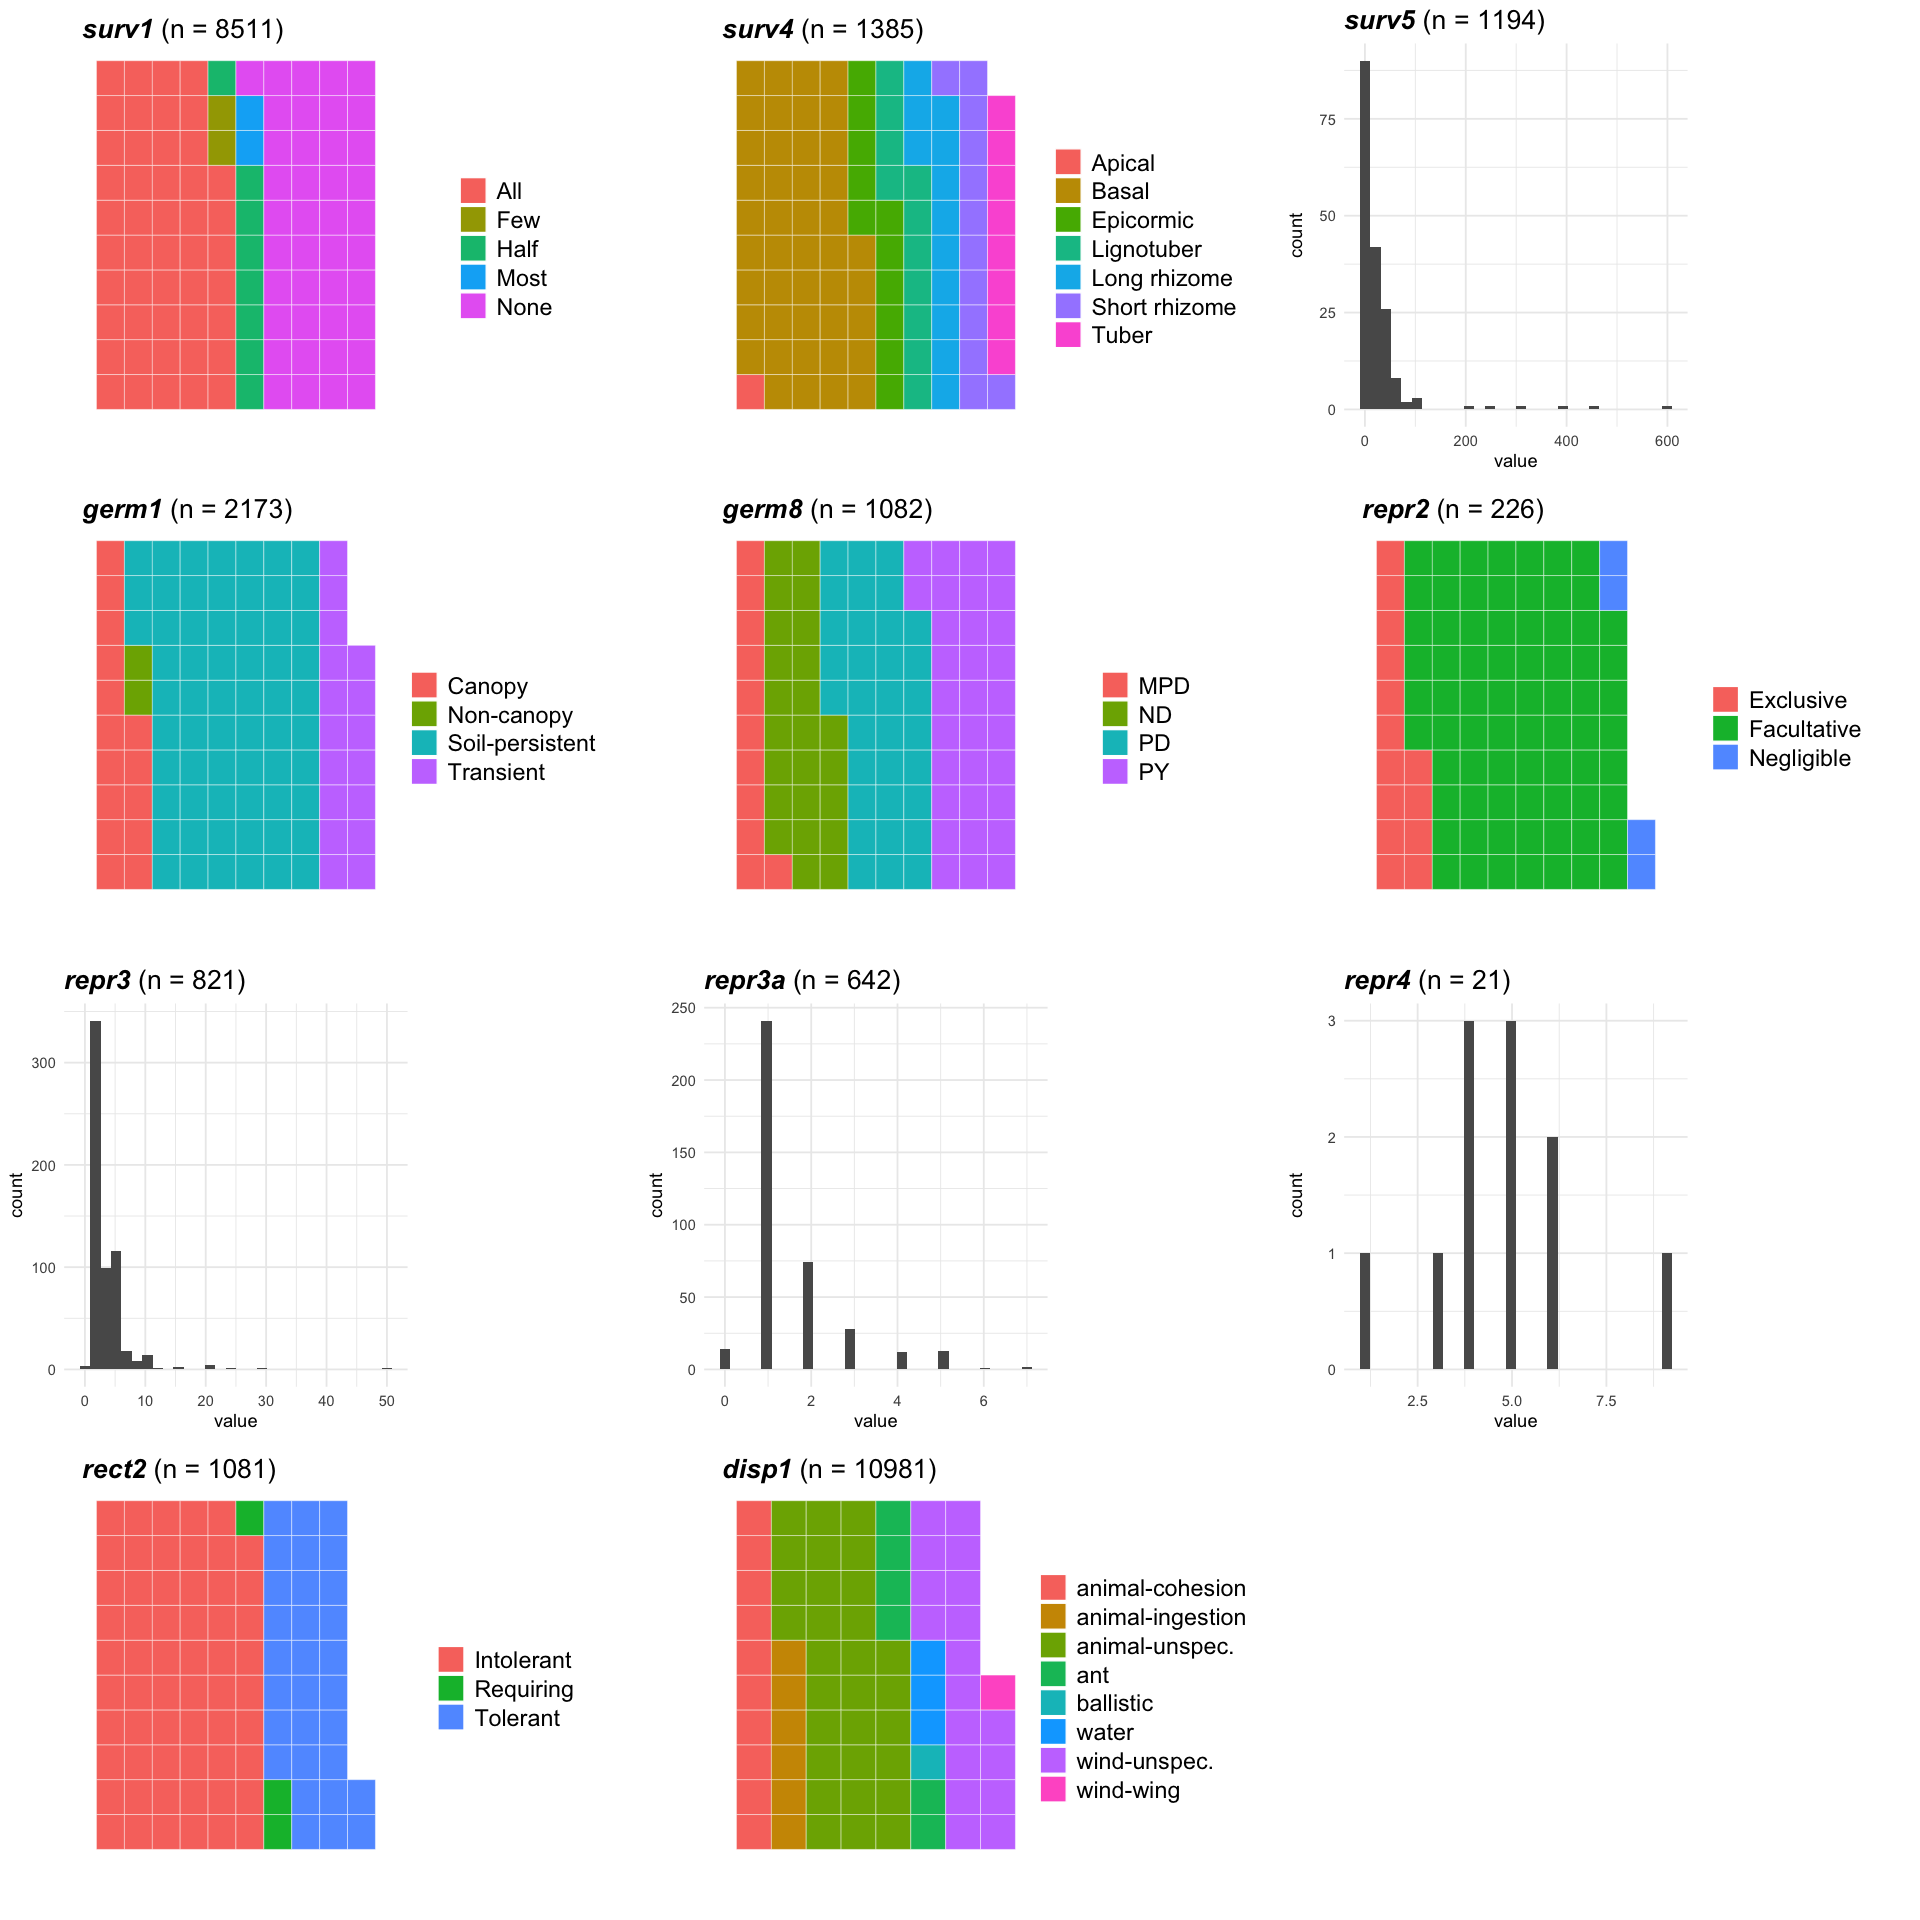

In [312]:
options(repr.plot.width=16, repr.plot.height=16) # Make plot larger

plot_grid(plot_surv1, plot_surv4, plot_surv5,
          plot_germ1, plot_germ8,
          plot_repr2, plot_repr3, plot_repr3a, plot_repr4,
          plot_rect2,
          plot_disp1, 
           align = "vh",
          labels = NA,
         ncol = 3)


## Fire history
Filter only sites burnt less than three years ago

In [141]:
last_fire <- sites_record |>
  mutate(last_fire = case_when(
      `Time since last fire (days)` %in% c(NA,"0 days","ERROR: mismatching dates") ~ 'unknown',
      !grepl("year", `Time since last fire (days)`) ~ 'recent',
      grepl("^(2 years|3 years|1 year)", `Time since last fire (days)`) ~ 'recent',
      TRUE ~ "older"
  )) |>
  select(`Survey`,`Site label`, `Visit date`, `Time since last fire (days)`, "last_fire")  |>
  rename(visit_id = `Site label`, visit_date = `Visit date`)

In [142]:
last_fire |> slice_sample(n=5)

Survey,visit_id,visit_date,Time since last fire (days),last_fire
<chr>,<chr>,<dttm>,<chr>,<chr>
Mallee Woodlands,T2017/4,2017-03-25,99 years and 108 days,older
UplandBasalt,CRC13B7C,2021-02-04,360 days,recent
Mallee Woodlands,S2012/4,2014-01-08,1 years and 103 days,recent
SthnNSWRF,MaxwellsCk,2021-12-02,2 years and 322 days,recent
NEWNES,CW1,2020-11-18,338 days,recent


In [143]:
sites_record |> slice_sample(n=5)

Survey,Site label,Location,Coordinates (WGS84),Elevation,Visit date,Visit description,Main observer,All observers,Time since last fire (days)
<chr>,<chr>,<chr>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>
Mallee Woodlands,S2010/3,"Stage 3 Scotia Sanctuary, Sunset Boulevard",141.112 -33.191,NA,2015-05-16,NA,"Keith, David",David Keith,5 years and 46 days
Mallee Woodlands,K260,Near T2000/2 - Centre Firetrail. Upper Slope. Site coordinates and names refer to the corresponding soil moisture probes.,141.161 -33.384,NA,2018-09-27,NA,"None, None",Jackie Miles; Gen Wright; Michael Doherty,NA
NEWNES,MW2,NA,150.191 -33.414,1101,2020-11-16,NA,"None, None",David Keith,336 days
NEWNES,EW2,NA,150.162 -33.370,1105,2020-08-24,NA,"None, None",David Keith,252 days
Yatteyattah,SCCJB37-Near,"Yattahyattah NR, just above east back of Currowan Ck a few metres upstream of junction with small tributary, c 130m directly W-WNW downhill from powerline staunchion",150.416 -35.255,30,2021-01-01,NA,"Miles, Jackie",Jackie Miles; David Keith,0 days


In [166]:
# 3. Calculate traits by species -----
# Number of individuals with a given trait. All the spp in the datset
full_spp_trait <- field_records |>
    filter(!is.na(species_code)) |>
  mutate(spp_type = case_when(
    resprout_organ %in% c("None") ~ "Seeder", 
    TRUE ~ "Resprouter")
  ) |>
 # left_join(species_list, by = c("species" = "Scientific name (as entered)")) |> # Add family information
  left_join(distinct(species_list), by = c("species_code" = "CAPS code")) |> # Add family information
  left_join(last_fire, by = c("visit_id","visit_date")) |>  # Add fire information
  filter(last_fire == "recent") |> # Calculate the metrics only for these sites with time since last fire <= 3 years
  group_by(Family, species, Survey, visit_id, visit_date, spp_type, resprout_organ, seedbank) |>
  summarise(n1 = sum(resprouts_live, na.rm = TRUE),         # N total live resprouts (N1)
            n2 = sum(resprouts_reproductive, na.rm = TRUE), # N reproductive live resprouts (N2)
            n5 = sum(recruits_live, na.rm = TRUE),          # N total live recruits (N5)
            n6 = sum(recruits_reproductive, na.rm = TRUE),  # N reproductive live recruits (N6)
            n7 = sum(resprouts_died, na.rm = TRUE),         # N Dead resprouts (N7). This variable is all 0
            n8 = sum(recruits_died, na.rm = TRUE),          # N dead recruits (N8)
            n9 = sum(resprouts_kill, na.rm = TRUE),      # N fire killed resprouts (N9)
            .groups = "drop"
) |>
  mutate(prop_fire_mortality = n9 /(n1 + n7 + n9),
         prop_sprout_surv = n7/ (n1 + n7),
         seed_adult = (n5 + n8) / (n1 + n7),
         pro_recruit_surv = n5 / (n5 + n8),
         prop_reprod_recruit = n6 / max(n5)
  ) |>
  as_tibble() 


In [167]:
full_spp_trait |> slice_sample(n=5)

Family,species,Survey,visit_id,visit_date,spp_type,resprout_organ,seedbank,n1,n2,n5,n6,n7,n8,n9,prop_fire_mortality,prop_sprout_surv,seed_adult,pro_recruit_surv,prop_reprod_recruit
<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Haloragaceae,Gonocarpus montanus,KNP AlpAsh,AlpAsh_69,2021-04-16,Resprouter,NA,Soil-persistent,0,0,6,0,0,0,0,NaN,NaN,Inf,1.0,0.000000e+00
Haloragaceae,Gonocarpus micranthus,NEWNES,GGW2,2020-11-17,Resprouter,NA,NA,0,0,3,0,0,0,0,NaN,NaN,Inf,1.0,0.000000e+00
Asteraceae,Brachyscome gracilis,UplandBasalt,MWL11,2020-11-18,Resprouter,NA,Soil-persistent,0,0,5,0,0,0,0,NaN,NaN,Inf,1.0,0.000000e+00
Brassicaceae,Stenopetalum lineare,Mallee Woodlands,S2012/4,2014-10-25,Seeder,None,Soil-persistent,0,0,1,1,0,1,0,NaN,NaN,Inf,0.5,1.371911e-05
Amaranthaceae,Ptilotus exaltatus var. exaltatus,Mallee Woodlands,T2006/1,2007-03-16,Seeder,None,Soil-persistent,0,0,16,0,0,0,0,NaN,NaN,Inf,1.0,0.000000e+00


In [135]:
full_spp_trait |> select(species) |> n_distinct()
full_spp_trait |> select(species,spp_type) |> n_distinct()


[1] 696

[1] 749

In [208]:
top_species

[1] "Triodia scariosa"                        
 [2] "Austrostipa scabra"                      
 [3] "Dodonaea viscosa subsp. angustissima"    
 [4] "Eucalyptus socialis"                     
 [5] "Beyeria opaca"                           
 [6] "Calandrinia eremaea"                     
 [7] "Eremophila glabra"                       
 [8] "Sclerolaena diacantha"                   
 [9] "Sclerolaena parviflora"                  
[10] "Solanum coactiliferum"                   
[11] "Chenopodium desertorum subsp. desertorum"
[12] "Eremophila glabra subsp. murrayana"      
[13] "Halgania cyanea"                         
[14] "Austrostipa nitida"                      
[15] "Eucalyptus dumosa"                       
[16] "Haloragis odontocarpa"                   
[17] "Eucalyptus costata"                      
[18] "Olearia subspicata"                      
[19] "Acacia ligulata"                         
[20] "Amphipogon caricinus"

In [174]:

# 5. Select the top 5 families -----
# Which are the families with more spp?
top_families <- species_list |>
    filter(!is.na(Family)) |>
  group_by(Family) |>
  summarise(
    n_spp = n_distinct(`Scientific name (as entered)`)
  ) |>
  arrange(desc(n_spp)) |>
  slice_head( n = 5 ) |>
  pull(Family)




In [190]:
#title = "<b>Distribution of species count by resprout organ<b>",
#       subtitle = "Variation in resprouting strategies among the top 5 families"
plot_organ_type <- full_spp_trait|> 
  filter(Family %in% top_families) |>
  filter(!is.na(resprout_organ)) |>
  group_by(Family, resprout_organ) |>
  summarise(n_species = n_distinct(species), .groups = "drop") |>
  arrange(n_species) |> 
  mutate(resprout_organ = fct_reorder(resprout_organ, desc(n_species))) |>
  ggplot(aes(x = resprout_organ, y = n_species)) +
  geom_bar(stat="identity", fill = "black") +
  facet_grid(~ Family) +
  coord_flip() +
  ylim(0, 60) +
  labs(y = "Number of species",
       x = "") +
  theme_classic() +
  theme(plot.title=element_markdown(), # Enable markdown for title and subtitle
        plot.subtitle=element_markdown())


In [191]:

       #title = "<b>Distribution of species count by seedbank type<b>",
       #subtitle = "Variation in seedbank strategies among the top 5 families") +
plot_seedbank <- full_spp_trait|> 
  filter(Family %in% top_families) |>
  filter(!is.na(seedbank)) |>
  group_by(Family, seedbank) |>
  summarise(n_species = n_distinct(species), .groups = "drop") |>
  arrange(n_species) |> 
  mutate(seedbank = fct_reorder(seedbank, desc(n_species))) |>
  ggplot(aes(x = seedbank, y = n_species)) +
  geom_bar(stat="identity", fill = "black") +
  facet_grid(~ Family) +
  ylim(0, 60) +
  coord_flip() +
  labs(y = "Number of species",
       x = "") +
  theme_classic() +
  theme(plot.title = element_markdown(), # Enable markdown for title and subtitle
        plot.subtitle = element_markdown())


Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_bar()`).”


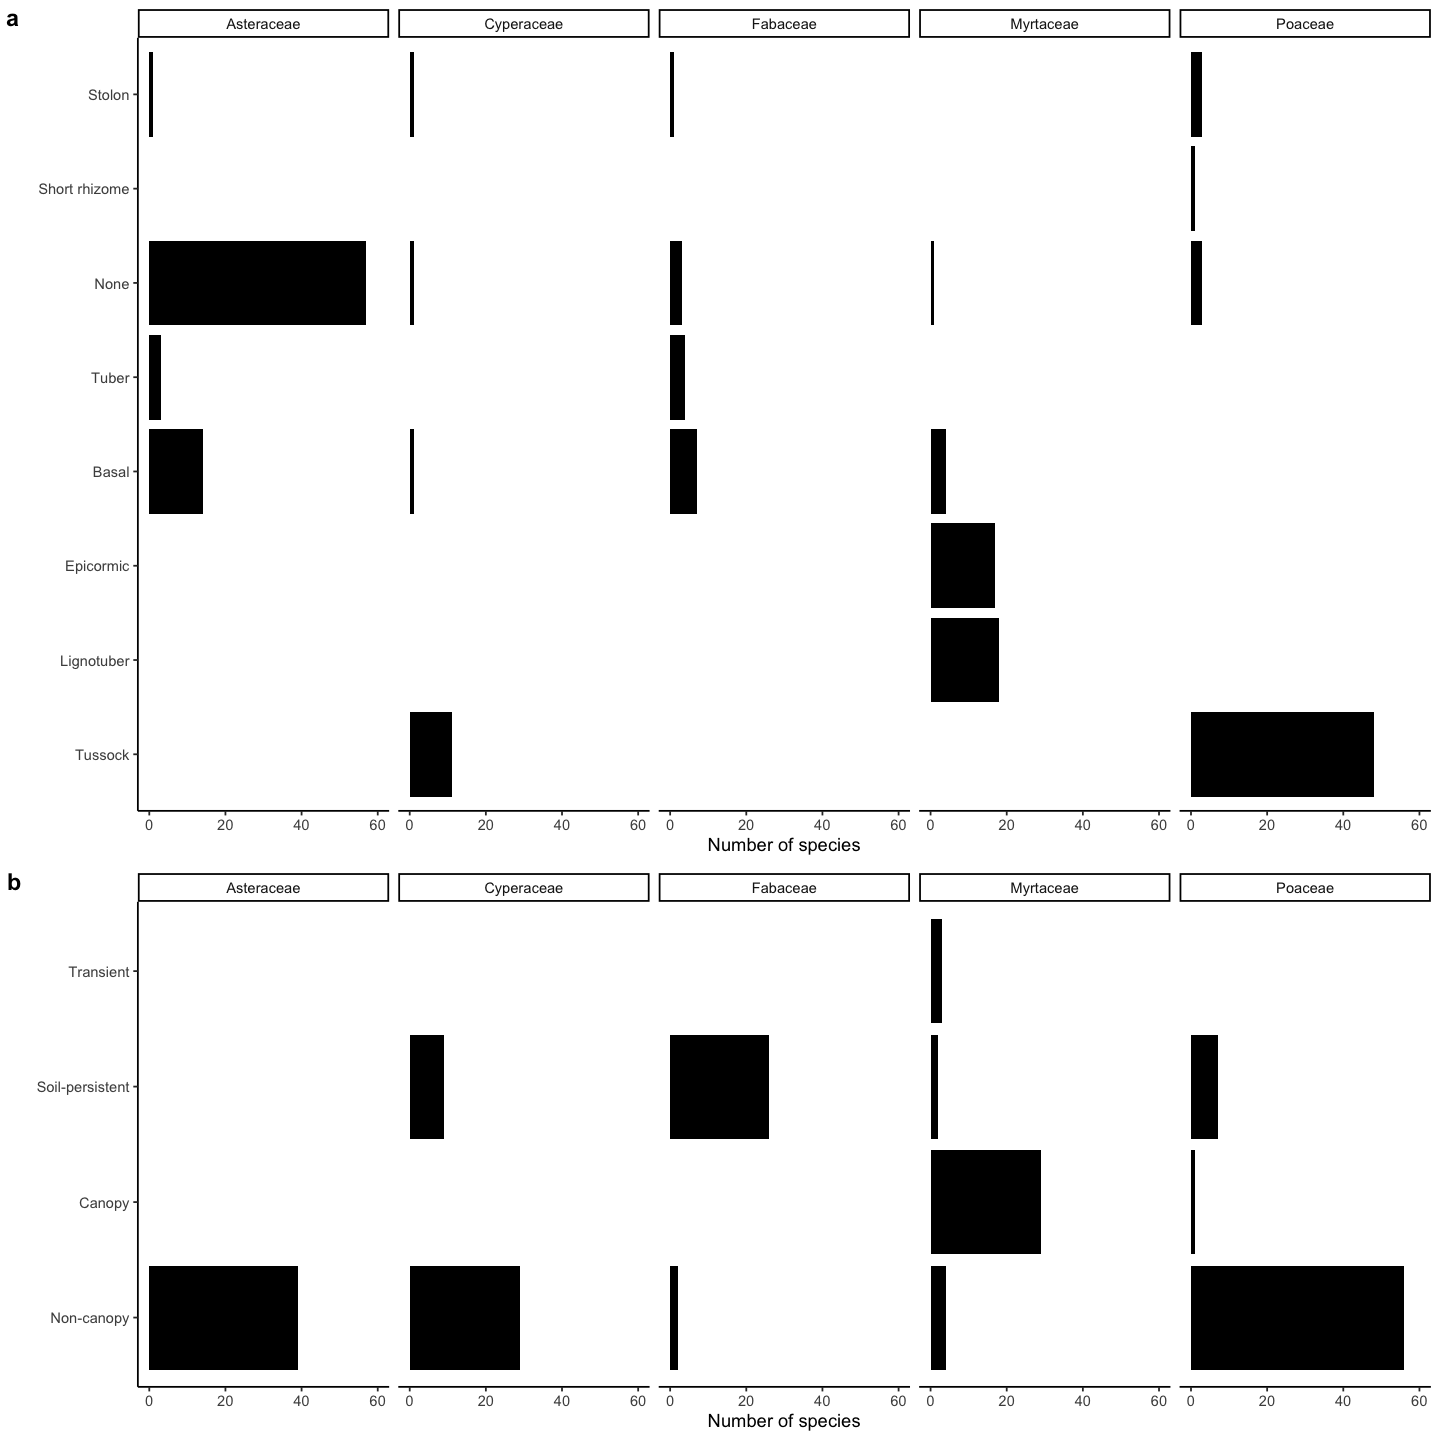

In [200]:
options(repr.plot.width=12, repr.plot.height=12) # Make plot larger
plot_grid(plot_organ_type, plot_seedbank, 
           align = "vh",
          labels = "auto",
          rel_heights = c(3, 2),
         ncol = 1)

In [227]:
library(ggridges)  

In [282]:

# 4. Select the top 20 spp ----
# Species with more localities and plots
top_species <- full_spp_trait |>
    filter(Survey %in% "Mallee Woodlands") |>
  group_by(species) |>
  summarise(
    n_localities = n_distinct(visit_id),
    n_visits = n_distinct(visit_id,visit_date)
  ) |>
arrange(desc(n_localities)) |>
slice_head(n=20) |> pull(species)


In [286]:
Mallee_dataset <- full_spp_trait |>
 #filter(species %in% top_species, Survey %in% "Mallee Woodlands") |> # Only the top 20 spp.
 #   filter(species %in% top_species) |> # Only the top 20 spp.
  mutate(species = reorder(species, spp_type, FUN = function(x) ifelse(x[1] == "Seeder", 1, 2)))

In [287]:
Mallee_dataset |> 
filter(!is.na(prop_fire_mortality), prop_fire_mortality>0) |> 
       select(prop_fire_mortality, species, spp_type)

prop_fire_mortality,species,spp_type
<dbl>,<fct>,<chr>
0.50000000,Bedfordia arborescens,Resprouter
1.00000000,Cassinia monticola,Seeder
1.00000000,Cassinia monticola,Seeder
1.00000000,Cassinia monticola,Seeder
1.00000000,Cassinia monticola,Seeder
0.06250000,Olearia argophylla,Resprouter
1.00000000,Ozothamnus cupressoides,Resprouter
1.00000000,Ozothamnus cupressoides,Seeder
1.00000000,Ozothamnus cupressoides,Seeder


In [289]:
?geom_histogram

geom_freqpoly {ggplot2},R Documentation
mapping,"Set of aesthetic mappings created by aes(). If specified and inherit.aes = TRUE (the default), it is combined with the default mapping at the top level of the plot. You must supply mapping if there is no plot mapping."
data,"The data to be displayed in this layer. There are three options: If NULL, the default, the data is inherited from the plot data as specified in the call to ggplot(). A data.frame, or other object, will override the plot data. All objects will be fortified to produce a data frame. See fortify() for which variables will be created. A function will be called with a single argument, the plot data. The return value must be a data.frame, and will be used as the layer data. A function can be created from a formula (e.g. ~ head(.x, 10))."
position,"Position adjustment, either as a string naming the adjustment (e.g. ""jitter"" to use position_jitter), or the result of a call to a position adjustment function. Use the latter if you need to change the settings of the adjustment."
...,"Other arguments passed on to layer(). These are often aesthetics, used to set an aesthetic to a fixed value, like colour = ""red"" or size = 3. They may also be parameters to the paired geom/stat."
na.rm,"If FALSE, the default, missing values are removed with a warning. If TRUE, missing values are silently removed."
show.legend,"logical. Should this layer be included in the legends? NA, the default, includes if any aesthetics are mapped. FALSE never includes, and TRUE always includes. It can also be a named logical vector to finely select the aesthetics to display."
inherit.aes,"If FALSE, overrides the default aesthetics, rather than combining with them. This is most useful for helper functions that define both data and aesthetics and shouldn't inherit behaviour from the default plot specification, e.g. borders()."
binwidth,"The width of the bins. Can be specified as a numeric value or as a function that calculates width from unscaled x. Here, ""unscaled x"" refers to the original x values in the data, before application of any scale transformation. When specifying a function along with a grouping structure, the function will be called once per group. The default is to use the number of bins in bins, covering the range of the data. You should always override this value, exploring multiple widths to find the best to illustrate the stories in your data. The bin width of a date variable is the number of days in each time; the bin width of a time variable is the number of seconds."
bins,Number of bins. Overridden by binwidth. Defaults to 30.
orientation,"The orientation of the layer. The default (NA) automatically determines the orientation from the aesthetic mapping. In the rare event that this fails it can be given explicitly by setting orientation to either ""x"" or ""y"". See the Orientation section for more detail."


Warning message:
“Removed 2197 rows containing non-finite outside the scale range (`stat_bin()`).”


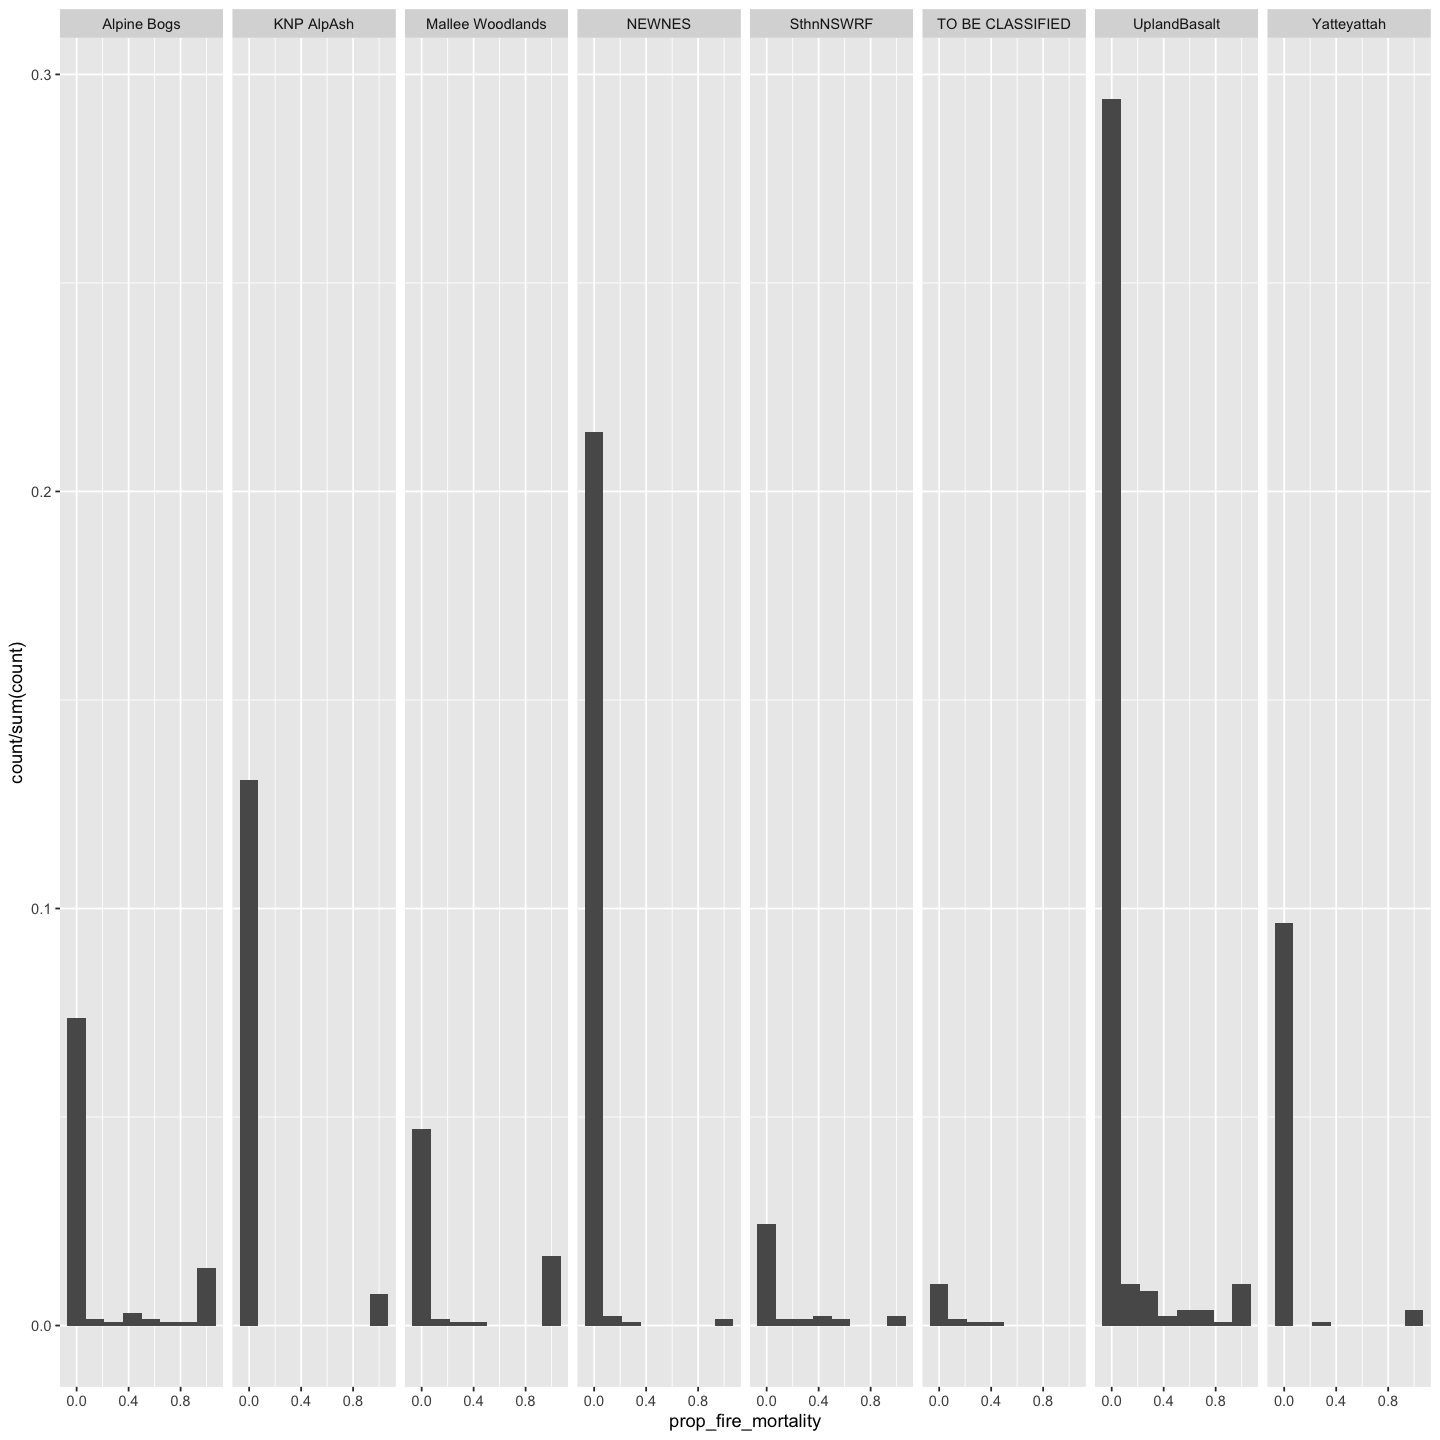

In [291]:
ggplot(Mallee_dataset, 
         aes(x = prop_fire_mortality)) +
geom_histogram(aes(y = after_stat(count / sum(count))), bins = 8) +
facet_grid(.~Survey)

In [253]:
plot_mortality <- 
  ggplot(Mallee_dataset, 
         aes(x = prop_fire_mortality, y = species, fill = spp_type, color = spp_type)) +
  geom_density() +
  theme_ridges() +
  labs(title = "Fire mortality",
       x = "Proportion",
       y = "",
       fill = "Species Type") +
  scale_fill_manual(values = c("Resprouter" = "#9EBCDA", "Seeder" = "#000000")) +
  scale_color_manual(values = c("Resprouter" = "#9EBCDA", "Seeder" = "#000000")) +
  scale_x_continuous(limits = c(0,1), breaks = seq(0, 1, by = 0.5)) +
  theme(legend.position = "none",
        axis.text.y = element_text(face = "italic") )

In [274]:
plot_recruit_surv <- 
    ggplot(Mallee_dataset,
        aes(x = pro_recruit_surv, y = species, fill = spp_type, color = spp_type)) +
  geom_density_ridges(stat = "binline",
                      bins = 5, draw_baseline = TRUE) +
  theme_ridges() +
  labs(title = "Recruit survival",
       x = "Proportion",
       y = "",
       fill = "Species Type") +
  scale_fill_manual(values = c("#9EBCDA", "#000000")) +
  scale_color_manual(values = c("#9EBCDA", "#000000")) +
  scale_x_continuous(limits = c(0,1), breaks = seq(0, 1, by = 0.5)) +
  theme(legend.position = "none",
        axis.text.y = element_blank())

plot_reprod_recruit <- 
    ggplot(Mallee_dataset,
       aes(x = prop_reprod_recruit, y = species, fill = spp_type, color = spp_type)) +
  geom_density_ridges(scale = 0.4) +
  theme_ridges() +
  labs(title = "Reproductive recruits",
       x = "Proportion",
       y = "",
       fill = "Species Type") +
  scale_fill_manual(values = c("#9EBCDA", "#000000")) +
  scale_color_manual(values = c("#9EBCDA", "#000000")) +
  scale_x_continuous(limits = c(0,1), breaks = seq(0, 1, by = 0.5)) +
  theme(legend.position = "none",
        axis.text.y = element_blank())



Warning message:
“Removed 201 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 195 rows containing non-finite outside the scale range (`stat_binline()`).”
Picking joint bandwidth of 0.284



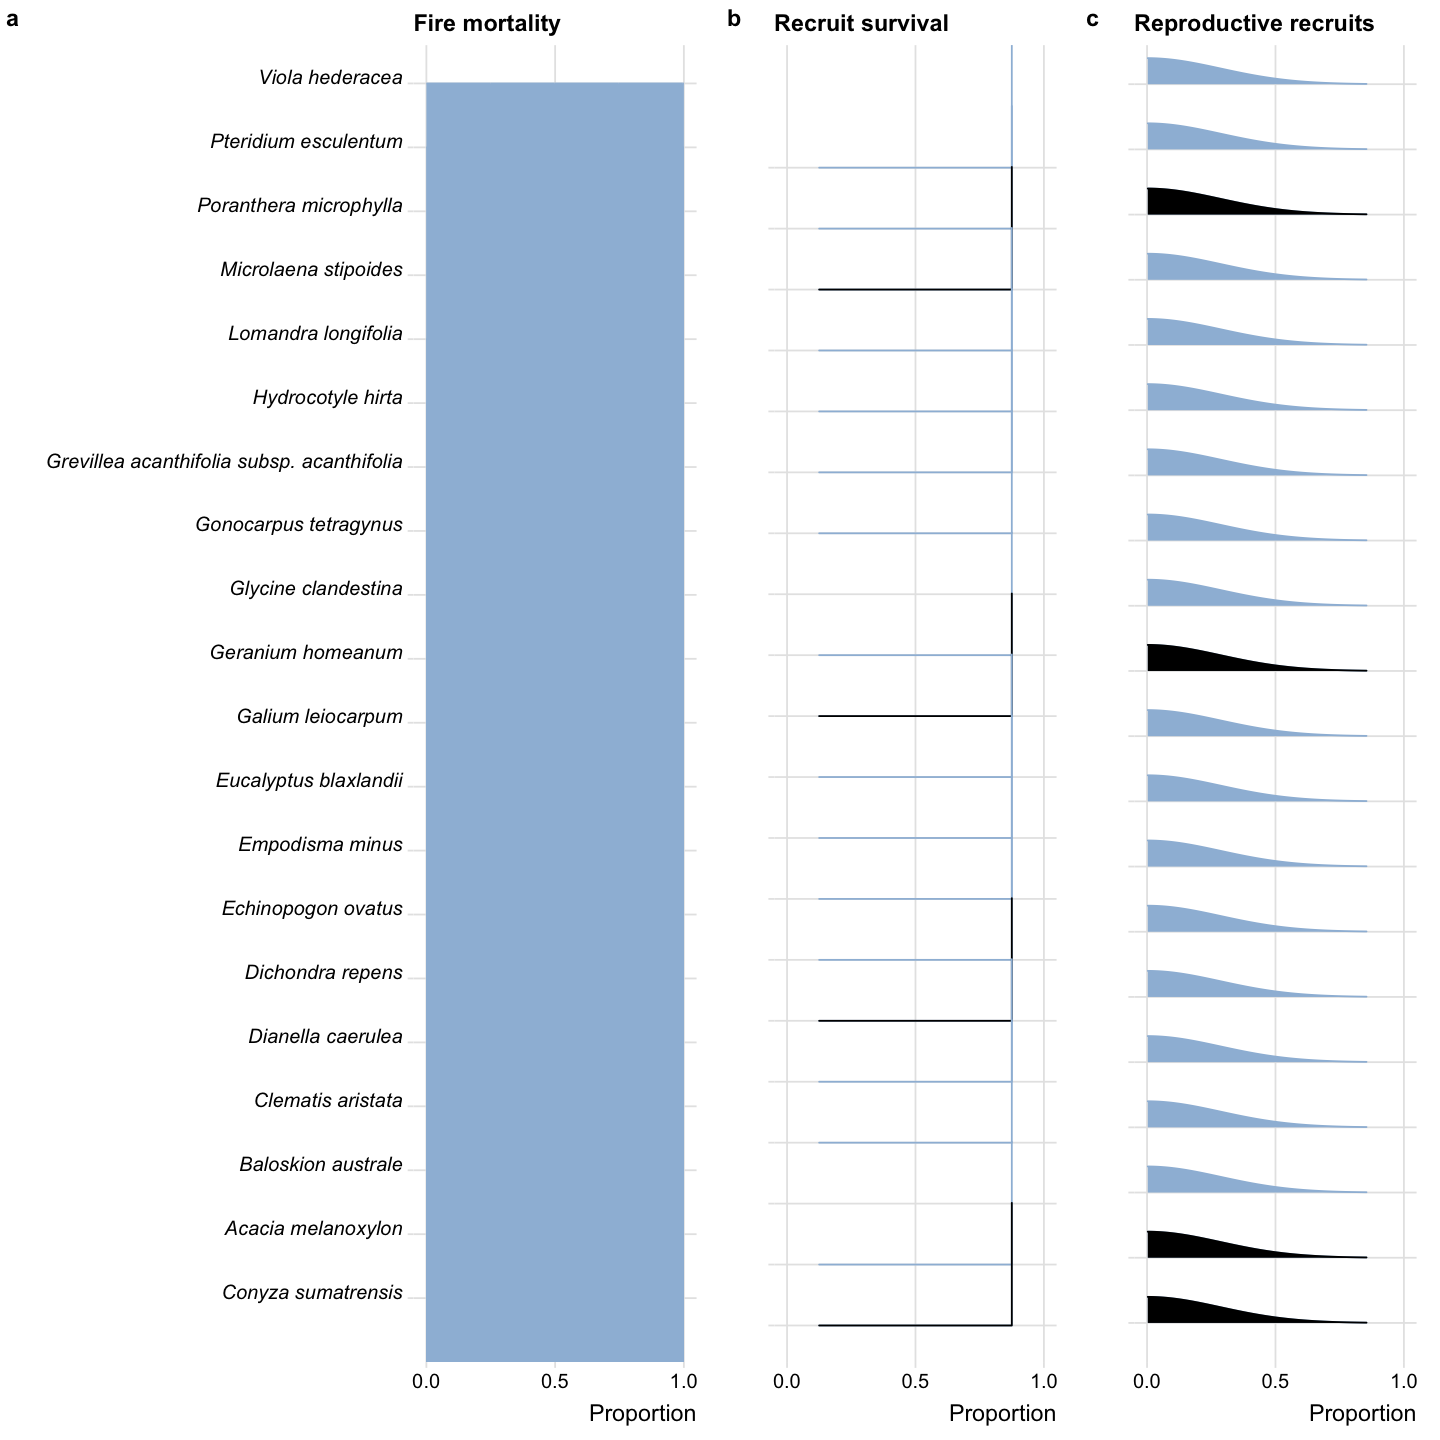

In [275]:
plot_grid(plot_mortality, plot_recruit_surv, plot_reprod_recruit,
          labels = "auto",
          rel_widths = c(2, 1, 1),
         ncol = 3)

In [224]:

library(patchwork)
plot_mortality + plot_recruit_surv + plot_reprod_recruit 
#+
#  plot_layout(ncol = 3) +
#  plot_annotation(title = 'Distribution of traits in the top 20 spp in the Mallee data',
#                  subtitle = 'Resprouter species in light blue and seeders in black. Only sites with time since the last fire sites ≤3 years were included in traits calculation'
#  ) #&
  #theme(plot.title = element_text(size = 16),
  #      plot.subtitle = element_text(size = 12) )

Picking joint bandwidth of 0.309

Warning message:
“Removed 447 rows containing non-finite outside the scale range (`stat_density_ridges()`).”
ERROR while rich displaying an object: Error in Ops.data.frame(guide_loc, panel_loc): ‘==’ only defined for equally-sized data frames

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime,

In [38]:
full_spp_trait |> count(spp_type)
full_spp_trait |> count(seedbank)
full_spp_trait |> count(resprout_organ)
full_spp_trait |> count(Family)
full_spp_trait |> count(last_fire)

spp_type,n
<chr>,<int>
Resprouter,2520
Seeder,1168


seedbank,n
<chr>,<int>
Canopy,268
Non-canopy,1156
Soil-persistent,1760
Transient,185
NA,319


resprout_organ,n
<chr>,<int>
Apical,18
Basal,289
Epicormic,73
Lignotuber,208
None,1168
Short rhizome,40
Stolon,124
Tuber,142
Tussock,250


Family,n
<chr>,<int>
Acanthaceae,3
Aizoaceae,1
Amaranthaceae,18
Anthericaceae,25
Aphanopetalaceae,2
Apiaceae,57
Apocynaceae,28
Araceae,1
Araliaceae,19


last_fire,n
<chr>,<int>
recent,3688


In [286]:
filter(field_records, visit_date<"2019-01-01") |>
group_by(species) |>
summarise(nsites = n_distinct(visit_id),
          nvisits = n_distinct(visit_id,visit_date),
         nplots = n_distinct(visit_id,visit_date,sample_nr)) |>
arrange(desc(nvisits)) |>
slice_head(n=15)

species,nsites,nvisits,nplots
<chr>,<int>,<int>,<int>
Triodia scariosa,58,82,452
Austrostipa scabra,60,79,386
Beyeria opaca,51,69,335
Sclerolaena diacantha,52,69,306
Eucalyptus socialis,49,68,300
Dodonaea viscosa subsp. angustissima,45,63,217
Sclerolaena parviflora,44,61,271
Eremophila glabra,44,57,172
Eucalyptus dumosa,40,55,212


In [287]:
filter(field_records, visit_date > "2019-01-01") |>
group_by(species) |>
summarise(nsites = n_distinct(visit_id),
          nvisits = n_distinct(visit_id,visit_date),
         nplots = n_distinct(visit_id,visit_date,sample_nr)) |>
arrange(desc(nvisits)) |>
slice_head(n=15)

species,nsites,nvisits,nplots
<chr>,<int>,<int>,<int>
Microlaena stipoides,31,31,56
Clematis aristata,28,28,57
Pteridium esculentum,28,28,50
Conyza sumatrensis,27,27,70
Hydrocotyle hirta,27,27,53
Smilax australis,27,27,57
Acacia melanoxylon,26,26,58
Geranium homeanum,26,26,43
Dichondra repens,25,25,44


In [291]:
spp_selection <- "Sclerolaena diacantha"
spp_selection <- "Microlaena stipoides"


datos_spp1 <- field_records |> 
    filter(species %in% spp_selection) |>
      group_by(visit_id, visit_date) |>
      summarise(n1 = sum(resprouts_live, na.rm = TRUE),         # N total live resprouts (N1)
                n2 = sum(resprouts_reproductive, na.rm = TRUE), # N reproductive live resprouts (N2)
                n5 = sum(recruits_live, na.rm = TRUE),          # N total live recruits (N5)
                n6 = sum(recruits_reproductive, na.rm = TRUE),  # N reproductive live recruits (N6)
                n7 = sum(resprouts_died, na.rm = TRUE),         # N Dead resprouts (N7)
                n8 = sum(recruits_died, na.rm = TRUE),          # N dead recruits (N8)
                n9 = sum(resprouts_kill, na.rm = TRUE),         # N fire killed resprouts (N9)
                .groups = "drop") |>
  mutate(n_fire_mortality = n1 + n7 + n9,
         prop_fire_mortality = n9 /(n1 + n7 + n9),
         n_sprout_surv = n1 + n7,
         prop_sprout_surv = n7/ (n1 + n7),
         seed_adult = (n5 + n8) / (n1 + n7),
         n_recruit_surv = n5 + n8,
         pro_recruit_surv = n5 / (n5 + n8),
         n_reprod_resprod = n1,
         n_reprod_recruit = n6, # the formula said N5 but this is the number of lives recruits
         prop_reprod_recruit = n6 / max(n5),
         surv_dens = n2 / 625, # plot area
         recruit_dens = n5 / 625 # plot area
         )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 31 rows containing non-finite outside the scale range (`stat_bin()`).”


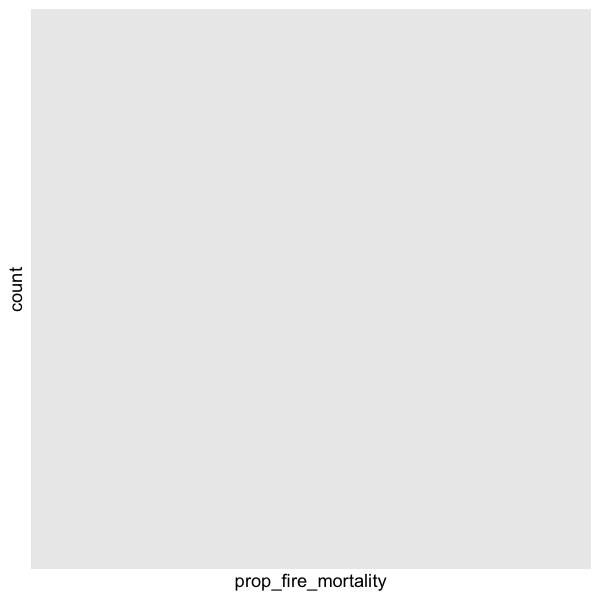

In [294]:
options(repr.plot.width=5, repr.plot.height=5) 
ggplot(datos_spp1) +
geom_histogram(aes(x=prop_fire_mortality))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


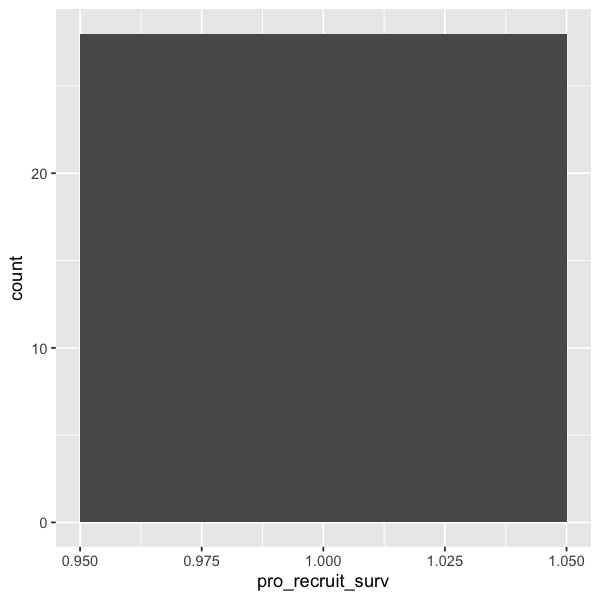

In [292]:
options(repr.plot.width=5, repr.plot.height=5) 
ggplot(datos_spp1) +
geom_histogram(aes(x=pro_recruit_surv))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


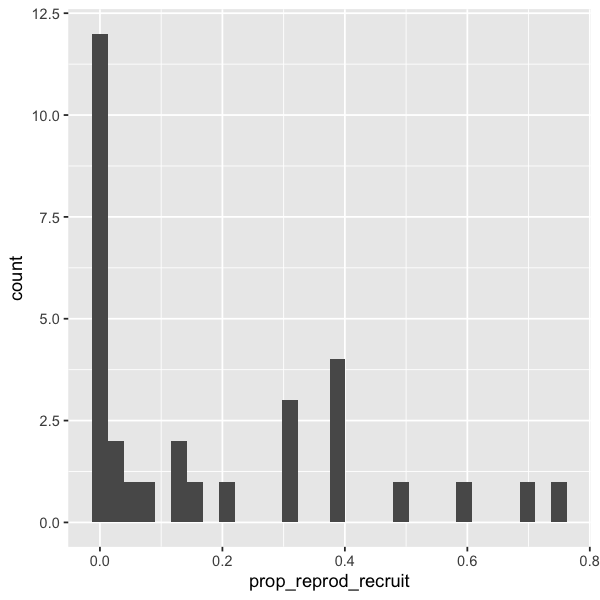

In [293]:
options(repr.plot.width=5, repr.plot.height=5) 
ggplot(datos_spp1) +
geom_histogram(aes(x=prop_reprod_recruit))

In [85]:
surv6_data

...1,scientific name,current code (BioNET),original name,CAPS code,trait code,trait name,method,weight,source ref,other ref,recordid,bound,value
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>


We will now look at how many species from the NSW BioNet Atlas are represented in the fireveg database. First let's take a look at the NSW flora, and then we will query how many species have information about fire ecology traits from existing sources or field work. We will combine this information in the final subsection.

#### Field work data

Next, we look at the taxa represented in the field work data. How many species have at least one record in the field sample?

In [23]:
spp_traits_table |>
    filter(`Field samples`) |>
    group_by(`species level`= taxonrank %in% "Species",establishment) |>
    summarise(records=n(), `original names` = n_distinct(spp), `current names`=n_distinct(current_species), .groups = "drop") 

species level,establishment,records,original names,current names
<lgl>,<chr>,<int>,<int>,<int>
FALSE,"Alive in NSW, Native",68,68,68
FALSE,Introduced,2,2,2
TRUE,"Alive in NSW, Native",812,812,806
TRUE,Introduced,84,84,81


In order to get more detailed break down of numbers, we use the `quadrat_samples` data frame:

In [24]:
quadrat_samples |> 
    filter(!is.na(species_code),
           taxonrank %in% "Species") |>
    group_by(survey_name) |>
    summarise(
        locations = n_distinct(visit_id),
        visits  = n_distinct(visit_id, visit_date),
        samples  = n_distinct(visit_id, visit_date, sample_nr),
        records = n(), 
        species = n_distinct(species),
        current_species = n_distinct(current_species), 
        codes = n_distinct(species_code))

survey_name,locations,visits,samples,records,species,current_species,codes
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Alpine Bogs,6,6,120,1435,109,109,109
KNP AlpAsh,8,8,32,593,85,85,85
Mallee Woodlands,61,85,510,7054,129,129,129
NEWNES,20,20,383,2950,109,109,109
Rainforests NSW-Qld,10,10,60,1503,271,270,271
Robertson RF,2,2,8,207,51,51,51
SthnNSWRF,4,4,15,162,67,67,67
TO BE CLASSIFIED,3,3,11,374,128,127,128
UplandBasalt,27,27,80,1454,231,230,231


The Mallee Woodlands survey is a longer time series of observation in a single region in Western New South Wales, while all the other surveys represent samples completed after the 2019-2020 fires in Eastern New South Wales. We will calculate summary statistics for these two groups:

In [25]:
summary_per_survey <- quadrat_samples |> 
    filter(!is.na(species_code),
           taxonrank %in% "Species") |>
    group_by(survey_group=survey_name %in% "Mallee Woodlands") |>
    summarise(
        locations = n_distinct(visit_id),
        visits  = n_distinct(visit_id, visit_date),
              samples  = n_distinct(visit_id, visit_date, sample_nr),
              records = n(), 
              species = n_distinct(species),
              current_species = n_distinct(current_species), 
              codes = n_distinct(species_code)) |> 
    arrange(survey_group)

In [26]:
summary_per_survey

survey_group,locations,visits,samples,records,species,current_species,codes
<lgl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
FALSE,85,85,714,8936,773,765,773
TRUE,61,85,510,7054,129,129,129


## That is it for now!

✅ Job done! 😎👌🔥

You can:
- go [back home](../Instructions-and-workflow.ipynb),
- continue navigating the repo on [GitHub](https://github.com/ces-unsw-edu-au/fireveg-analysis)
- continue exploring the repo on [OSF](https://osf.io/h96q2/).
- visit the database at <http://fireecologyplants.net>